In [40]:
!pip install catboost

## **DataSet**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
carPrice = pd.read_csv('/content/drive/MyDrive/Estudos Manu + Rodriguinho/2° ano/Machine Learning/Abril/03.04/CarPrice_Assignment(1).csv')

## **Análise Exploratória**

In [42]:
carPrice.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
23,24,1,dodge d200,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957.0
181,182,-1,toyouta tercel,gas,std,four,wagon,rwd,front,104.5,187.8,66.5,54.1,3151,dohc,six,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750.0
54,55,1,mazda glc deluxe,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395.0
169,170,2,toyota starlet,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2551,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.0
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0


In [43]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [44]:
# Verificando a existência de nulos
carPrice.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [45]:
carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## **Exploração Gráfica**

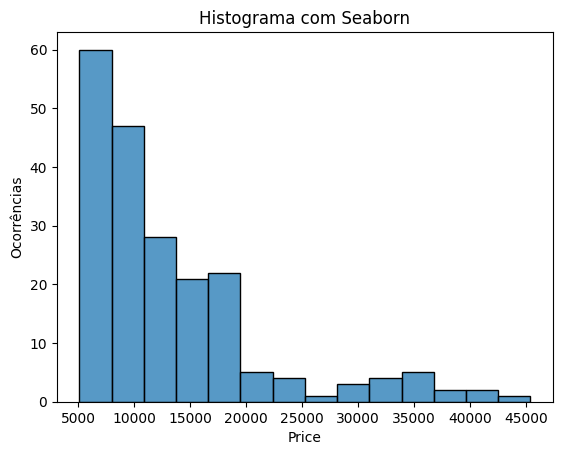

In [46]:
# Verificando a distruição da variável target
sns.histplot(carPrice["price"])

plt.xlabel('Price')
plt.ylabel('Ocorrências')
plt.title('Histograma com Seaborn')
plt.show()

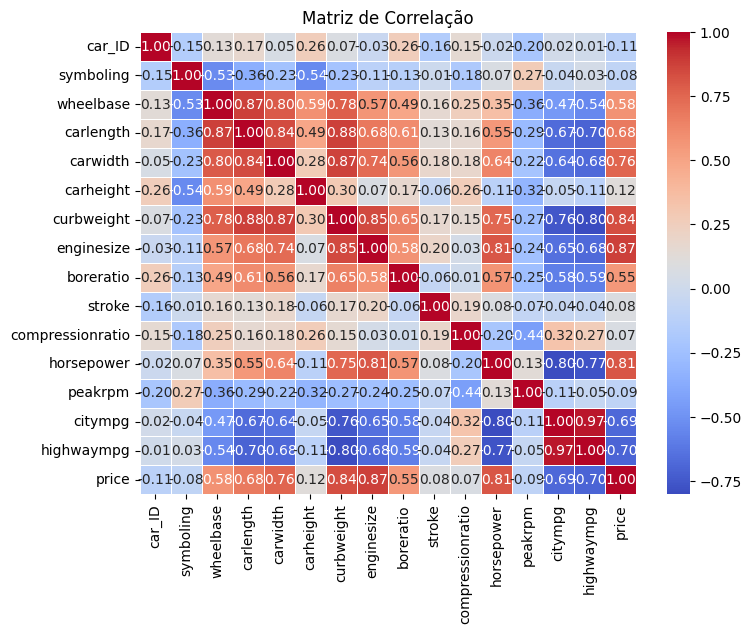

In [47]:
# Verificando a correlação entre as variáveis
num_cols = carPrice.select_dtypes(include=['int64', 'float64']).columns
correlacao = carPrice[num_cols].corr()

# Criando o heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Personalizando o gráfico
plt.title("Matriz de Correlação")
plt.show()

## **Treinando modelos e escolhendo variáveis**

In [75]:
def assertividade(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    return {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R²": r2
    }

In [76]:
X = carPrice[num_cols].drop(['price', 'car_ID'], axis=1)
y = carPrice['price']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Separando entre treino e teste

### **Bagging models**

#### **Random Forest**

In [78]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [79]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
y_pred = rf_model.predict(X_test)

In [81]:
assertividade(y_test, y_pred)

{'MSE': 3852619.031824097,
 'MAE': 1330.2925483870965,
 'RMSE': np.float64(1962.8089646789615),
 'MAPE': np.float64(10.579054968504625),
 'R²': 0.9443941172736879}

#### **Extra Tree Regressor**

In [82]:
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [83]:
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [84]:
y_pred = et_model.predict(X_test)

In [85]:
assertividade(y_test, y_pred)

{'MSE': 6311082.870716275,
 'MAE': 1483.2092419354838,
 'RMSE': np.float64(2512.186870182287),
 'MAPE': np.float64(10.89926263373027),
 'R²': 0.9089104499857775}

### **Boosting models**

#### **Gradient Boost Regressor**

In [86]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [87]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [88]:
y_pred = gb_model.predict(X_test)

In [89]:
assertividade(y_test, y_pred)

{'MSE': 5567615.765310537,
 'MAE': 1578.01947690272,
 'RMSE': np.float64(2359.5795738458446),
 'MAPE': np.float64(11.734279687926536),
 'R²': 0.919641109916741}

#### **Ada Boost Regressor**

In [90]:
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

In [91]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [92]:
y_pred = ada_model.predict(X_test)

In [93]:
assertividade(y_test, y_pred)

{'MSE': 6485687.691817829,
 'MAE': 1953.6163483936332,
 'RMSE': np.float64(2546.7013354176083),
 'MAPE': np.float64(16.320512804691493),
 'R²': 0.9063903318205966}

#### **XGBoost Regressor**

In [94]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [95]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [96]:
y_pred = xgb_model.predict(X_test)

In [97]:
assertividade(y_test, y_pred)

{'MSE': 5910936.198845157,
 'MAE': 1687.204613344254,
 'RMSE': np.float64(2431.241698977121),
 'MAPE': np.float64(12.773167160079653),
 'R²': 0.9146858741129991}

#### **LightGBM Regressor**

In [98]:
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

In [99]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 14
[LightGBM] [Info] Start training from score 13408.503497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(random_state=42)

In [100]:
y_pred = lgbm_model.predict(X_test)

In [101]:
assertividade(y_test, y_pred)

{'MSE': 8733957.633446725,
 'MAE': 1900.9335248599323,
 'RMSE': np.float64(2955.3269926434073),
 'MAPE': np.float64(13.650595076812309),
 'R²': 0.8739404493695625}